<a href="https://colab.research.google.com/github/skhabiri/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/LS_DS17_422_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Unit 4, Sprint 2, Module 2*

---

# Train (Prepare)
__*Neural Network Foundations*__

## Learning Objectives
* <a href="#p1">Part 1</a>: explain the intuition behind backpropagation and gradient descent
* <a href="#p2">Part 2</a>: able to discuss the importance of batch size
* <a href="#p3">Part 3</a>: able to discuss the importance of learning rate

## Summary of Yesterday

Yesterday, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

  <center><img src="https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/IMG_0167.jpeg" width=400></center>

- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights, $\theta$
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize $J(\theta)$ as a function of parameters $\theta$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

# Backpropagation & Gradient Descent (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in doing so help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

### Review: A basic derivative 

![](https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/derivativelimitdef.gif)

### Gradients: Multi-dimensional derivatives

![](https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/gradient.png)



Because a derivative can have a component in multiple dimensions, we define a gradient as a multi-dimensional derivative that takes on the form of a vector. Why a vector? Because gradients have both direction and magnitude. 

**In short, gradients point in the direction of greatest change.**
![](https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/OI6Gy.gif)

### Gradient Descent Formula 
This is a general formula for standard Gradient Descent. 
<center><img src="https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/1406-7.png" width=300><center>
$\theta$ is weight, J is the loss function.

There are more sophisticated version of gradient descent commonly referred to as [**Adaptive Gradient Descent**](https://ruder.io/optimizing-gradient-descent/). 


These adaptive models all build off of this simple equation, so it's best to first understand the standard form of Gradient Descent, then move on to more sophisticated versions. 

### Geometry of Gradient Descent 

![](https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/yk1mk.png)

## Convex vs. Non-Convex

Loss curves won't always have a single minimum point for gradient descent to converge towards. Sometimes there are multiple minimums. 

**Global Minimum:** The absolute minimum location of a curve (or surface). 

**Local Minimum:** The local minimum location of a curve (or surface). 

### In 2-Dimensions
![](https://lh3.googleusercontent.com/o0J1qW2PhvrgsPbYzKgnuNGDyjZF7wug3OBwDPwY5LXD0Vjg3t3otN6ecZ64K8J62sNonpvZxzKTs0pMr9YniDUmQC5J-IFXmSNvRJTbxr9kyAfNP-_A7HdC8hEa9x1dDgnf9jSp)


### In 3-Dimensions 
In Calculus, those ambiguous points that take on the form of both local mins and local maxs are known as [**Saddle points**](https://en.wikipedia.org/wiki/Saddle_point). It's not necessary to dive into the mathematics, the key take away is that non-convex error curves (and surfaces) have this global/local minimum issue. 

![](https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/convex-non-convex-9c8cb9320d4b0392c5f67004e8832e85.jpg)


**Take Away:** The issue is that you might think that gradient descent has converged toward a global minimum but it might actually be stuck in a local minimum. 

There are at least 2 possible solutions to this problem: 

1) Use different appraoches to randomly initalizing your model weights
For this check out [Keras's docs on Weight Initializers](https://keras.io/api/layers/initializers/). Treat these weight initializers as just another hyper-parameter to include in your gridsearch. It's a good idea to get into the practice of including these in your gridsearches. 


2) Use non-gradient descent optimizers such as [Particle Swarm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) or [Genetic Algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm). Feel free to read up on these appraoches but know that **you are not expected to know these appraoches** and they are outside the scope of this course. 

## Follow Along

In this section, we will begin a simple neural network using base TensorFlow. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

<center><img src="https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/IMG_99C94113202D-1.jpeg" width=500></center>

### Generate some Fake Data

In [122]:
import tensorflow as tf

# Imagine that our data is drawn from a linear function
# y = 3.5*hours_studying + 50

TRUE_W = 3.5
TRUE_b = 50.0
NUM_EXAMPLES = 1000

# Default is mean=0 std=1, dtype=tf.float32, a subclass of numpy array!
inputs = tf.random.normal(shape=[NUM_EXAMPLES], mean=0, stddev=1, dtype=tf.float32, seed=42)
noise = tf.random.normal(shape=[NUM_EXAMPLES], mean=0, stddev=1, dtype=tf.float32, seed=42)

outputs = inputs * TRUE_W + TRUE_b + noise

In [123]:
type(inputs)

tensorflow.python.framework.ops.EagerTensor

In [124]:
inputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.30181396,  0.3082868 ,  0.26419073,  1.3887519 ,  0.10319646],
      dtype=float32)>

In [125]:
noise[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([-0.6421852 ,  0.14922464,  1.6643958 ,  0.21560265, -1.1721212 ],
      dtype=float32)>

In [126]:
outputs[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([48.301464, 51.228226, 52.58906 , 55.076233, 49.189064],
      dtype=float32)>

### Loss Function
Here we will use Mean Squared Error (MSE), because this is a regression problem. We are trying to predict a continuous target.

<left><img src="https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/1_-e1QGatrODWpJkEwqP4Jyg.png" width=200></left>

In [127]:
def loss(target_y, predicted_y):
  "MSE, Note that the loss function operates over the entire array"
  # Computes the mean of elements across dimensions of a tensor.
  # Computes square of x element-wise.
  return tf.reduce_mean(tf.square(target_y - predicted_y))

### Neural Network Architecture
Lets create a Neural Network class called "Model" to contain this functionality. Note: This is essentially a linear regression whose coefficients are trained by gradient descent. In practice, gradient descent works on much more complex function like the multi-layer networks we constructed yesterday.

In [128]:
dir(tf)[:20] + dir(tf)[-20:]

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'type_spec_from_value',
 'types',
 'uint16',
 'uint32',
 'uint64',
 'uint8',
 'unique',
 'unique_with_counts',
 'unravel_index',
 'unstack',
 'variable_creator_scope',
 'variant',
 'vectorized_map',
 'version',
 'where',
 'while_loop',
 'xla',
 'zeros',
 'zeros_initializer',
 'zeros_like']

*In TensorFlow the differences between constants and variables are that when you declare some constant, its value can't be changed in the future (also the initialization should be with a value, not with operation). Nevertheless, when you declare a Variable, you can change its value in the future with tf.assign() method (and the initialization can be achieved with a value or operation).*

In [129]:
# Experiment with tensor operator
w = tf.Variable([[1.], [2.]])
x = tf.constant([[3., 4.]])
print(w)
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>


<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[3., 4.]], dtype=float32)>

In [130]:
# Like numpy expands dimensions:
"""
[1,1]   [3,4]   [4,5]
[2,2] + [3,4] = [5,6]
"""
w+x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 5.],
       [5., 6.]], dtype=float32)>

In [131]:
# It's an element-wise multiplication
tf.matmul(w, x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3., 4.],
       [6., 8.]], dtype=float32)>

In [132]:
# inherits from the object class
class Model(object):

  def __init__(self):
    self.W = tf.Variable(8.0)
    self.b = tf.Variable(40.0)

  # So, the __init__ method is used when the class is called to initialize the instance, 
  # while the __call__ method allows the class's instance to be called as a function, and returns a value
  def __call__(self, x):
    return self.W * x + self.b

model = Model()

In [133]:
print(type(model))
# W and b are of type tensor
print(type(model(3.0)))
print(model(3.0))
print(model(3.0).numpy())

<class '__main__.Model'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(64.0, shape=(), dtype=float32)
64.0


In [134]:
# Model() passes self to __call__() method
Model().__call__(3) == 64

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [135]:
# Alternative way to call the __call__() method on the instance of class Model: Model()
Model()(3)

<tf.Tensor: shape=(), dtype=float32, numpy=64.0>

**Tensor has a shape, dtype and numpy value**

### Initial Weights
The initial weights in our model were arbitrary. In practice, weights are initialized randomly. 

In [136]:
loss(outputs, model(inputs))

<tf.Tensor: shape=(), dtype=float32, numpy=119.52892>

> *In **'%x.yf'** x is the <u>minimum</u> field width, and y is number of digits after the decimal point.*

For example, to force the output to have at least 6 characters with 2 after the decimal point you do:
```
'%06.2f' % (3.141592653589793,)
Output: 003.14```

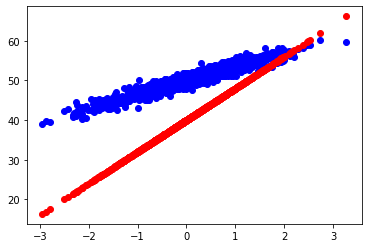

Current loss: 119.528923


In [137]:
import matplotlib.pyplot as plt

# blue is the provided target value
plt.scatter(inputs, outputs, c='b')

# red is the prediction.
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(outputs, model(inputs)).numpy())

In [138]:
print('Current loss: %1.2f' % loss(outputs, model(inputs)).numpy())

Current loss: 119.53


### Update Weights Based on Gradient

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*

You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). 

Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals.

GradientTape():
Operations are recorded if they are executed within this context manager and at least one of their inputs is being "watched". Trainable variables (created by tf.Variable or tf.compat.v1.get_variable, where trainable=True is default in both cases) are automatically watched. Tensors can be manually watched by invoking the watch method on this context manager.

### Normalizing data helps your model learn

Whenever all data is normalized to values within 0 and 1, that ensures that the update to all the weights are updated in equal proportions which can lead to quicker convergence on the optimal weight values. 

**Hint:** if your dataset's values range accross multiple orders of magnitude (i.e. $10^1,~~10^2,~~10^3,~~10^4$), then gradient descent will update the weights in grossly uneven proportions.  


![](https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/contour_plot.png)

There's more to be said about Normalization and Gradient Descent, however there's not enough time! So I highly encourage you to [**read throught this very well written article that explores the impact of normalization on Gradient Descent in much greater detail.**](https://www.jeremyjordan.me/batch-normalization/) 

In [139]:
 def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t: 
        # recording :
        current_loss = loss(outputs, model(inputs))

    #takes the gradient of current_loss vs W and b, dw is actually d(Loss)/dW
    dW, db = t.gradient(current_loss, [model.W, model.b])
    # for dW>0 lowering W with lower Loss (Learning_rate>0): W = W - learning_rate * dW
    # assign_sub(ref, value) >> ref = ref-value (assign subtraction)
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

    return current_loss

In [140]:
class B(object):
    def __init__(self):
        self.b1 = 20

def test1(a, b, model1):
    a = a + 2
    b.b1 = b.b1 + 2
    model1.W = tf.constant(-5.5)
#     model1.W = model1.W.assign_sub(5.5)
    return b

model = Model()
b = B()
a = 1

# model.W = tf.Variable(12.3)
b = test1(a, b, model)
a, b.b1, model.W


(1, 22, <tf.Tensor: shape=(), dtype=float32, numpy=-5.5>)

### Train the Network

In [141]:
model = Model()

# Store Some history of weights
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    # W.numpy() gets the value of the tensor W
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    # current_loss is the same as train return value
    current_loss = loss(outputs, model(inputs))

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=8.00 b=40.00 loss=119.52892
Epoch  1: W=7.17 b=41.99 loss=77.76721
Epoch  2: W=6.49 b=43.58 loss=50.73836
Epoch  3: W=5.94 b=44.85 loss=33.24050
Epoch  4: W=5.48 b=45.88 loss=21.90996
Epoch  5: W=5.11 b=46.70 loss=14.57118
Epoch  6: W=4.80 b=47.36 loss=9.81669
Epoch  7: W=4.55 b=47.89 loss=6.73569
Epoch  8: W=4.35 b=48.31 loss=4.73865
Epoch  9: W=4.18 b=48.65 loss=3.44389


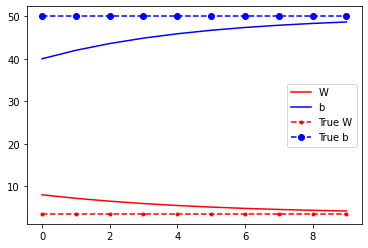

In [142]:
import matplotlib.pyplot as plt
# Format Strings: fmt = '[marker][line][color]'
#  plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), '.--r',
         [TRUE_b] * len(epochs), 'o--b')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

# Batch Size (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

### Batch Size
**Batches are the number of observations our model is shown to make predictions and update the weights. Batches are selected randomly during epoch. All observations are considered when passing thru an epoch at some point.**

* Smaller Batch = Slower Run Time (but maybe more accurate results)
* Default Batch = Balance between speed and accuracy
* Large Batch = Very fast, but not nearly as accurate.

# Learning Rate (Learn)

![](https://github.com/skhabiri/ML-ANN/raw/main/module2-Train/images/learning_rate.png)

### Baseline Model

In [143]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

Accent


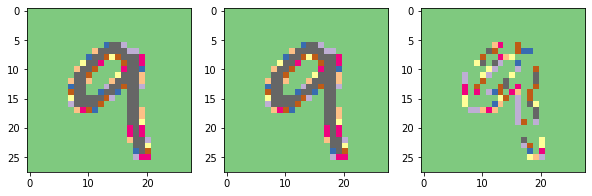

binary


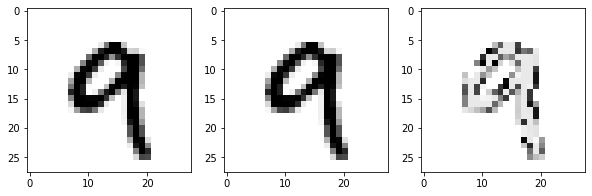

In [144]:
import matplotlib.pyplot as plt
cmaps = ['Accent', 'binary']
for i, cmap in enumerate(cmaps):
    fig= plt.figure(figsize=(10,20))
    print(cmap)
    plt.subplot(2,3,1+i*3)
    plt.imshow(X_train[110], cmap)
    ax2 = plt.subplot(2,3,2+i*3)
    plt.imshow(X_train[110]/800, cmap)
    plt.subplot(2,3,3+3*i).imshow(X_train[110]*800, cmap)
    plt.show()

> Seems like scaling down the number in the array does not change the color mapping. However, scaling up changes the color assignment.

In [145]:
# Normalize the colors between 0 and 1, colors won't change
X_train = X_train / 255.
X_test = X_test / 255.

# it's 28pixels * 28 pixels
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

In [146]:
# Our Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
from tensorflow.keras import initializers

def create_model(optim=Adam, lr=0.01):
    """
    Stochastic Gradient Descent SGD optimizer
    784+1 * 32+1 * 32+1 * 10
    """
    opt = optim(learning_rate=lr)

    model = Sequential(
        [
        # 784 inputs + 1 bias connect to 32 1st layer Hiddent neurons
        Dense(32, activation='relu', input_dim=784, 
            kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42),
            bias_initializer=initializers.Ones()
             ),
        # 32 1st-H-Neurons + 1 bias connected to 32 2'nd layer H-Neurons
        Dense(32, activation='relu', 
            kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42), 
            bias_initializer=initializers.Zeros()
             ),
        # 32 2nd-H-neurons connect to 10 Output neurons
        Dense(10, activation='softmax', 
            kernel_initializer=initializers.Ones(), 
            bias_initializer=initializers.Zeros()
             )       
        ]
    )
    # sparse_categorical_crossentropy is good for multilable classification, when target labels are integer
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [147]:
mnist_model = create_model()
[m for m in dir(mnist_model) if not m.startswith("_")]

['activity_regularizer',
 'add',
 'add_loss',
 'add_metric',
 'add_update',
 'add_variable',
 'add_weight',
 'apply',
 'build',
 'built',
 'call',
 'compile',
 'compiled_loss',
 'compiled_metrics',
 'compute_dtype',
 'compute_mask',
 'compute_output_shape',
 'compute_output_signature',
 'count_params',
 'distribute_strategy',
 'dtype',
 'dtype_policy',
 'dynamic',
 'evaluate',
 'evaluate_generator',
 'fit',
 'fit_generator',
 'from_config',
 'get_config',
 'get_input_at',
 'get_input_mask_at',
 'get_input_shape_at',
 'get_layer',
 'get_losses_for',
 'get_output_at',
 'get_output_mask_at',
 'get_output_shape_at',
 'get_updates_for',
 'get_weights',
 'history',
 'inbound_nodes',
 'input',
 'input_mask',
 'input_names',
 'input_shape',
 'input_spec',
 'inputs',
 'layers',
 'load_weights',
 'loss',
 'losses',
 'make_predict_function',
 'make_test_function',
 'make_train_function',
 'metrics',
 'metrics_names',
 'name',
 'name_scope',
 'non_trainable_variables',
 'non_trainable_weights',
 '

In [148]:
mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [149]:
a = (785*32, 33*32, 33*10)
a, sum(list(a))

((25120, 1056, 330), 26506)

### Fit the model for a parameter
This is a function to fit the model for a parameter with a list of values

In [173]:
def fit_param(param_lst, key, **kwargs):
    
    """
    This function fits a ANN created by create_model() while sweeping a parameter
    param_list: list of values for the parameter
    key: string key for the parameter. Values: "lr", "batch_size", "epochs", "optimizer"
    return: a dictionary with 
    {f"{par}_": [fitted model, fitted result],
    "key": key, "param_lst": param_lst}
    model_dict[f"{par}_"][0] is the model
    model_dict[f"{par}_"][1] is the fit result
    **kwargs: lr=0.01, batch=32, epoch=25, optimizer=Adam
    """
    # initialize **kwargs:
    (lr, batch, epoch, optimizer) = (0.01, 32, 25, Adam)
    
    param_dict = {"lr": lr, "batch_size": batch, 
                  "epochs": epoch, "optimizer": optimizer}
    model_dict={}
    model_dict["key"] = key
    model_dict["param_lst"] = param_lst
    for par in param_lst:
        param_dict[key] = par
        print(f"********* Fitting for {key}={param_dict[key]} *********")
        model_dict.setdefault(f"{par}_", [None, None])
        model_dict[f"{par}_"][0] = create_model(param_dict["optimizer"], param_dict["lr"])
        
        model_dict[f"{par}_"][1] = model_dict[f"{par}_"][0].fit(
            X_train, y_train,
            # Hyperparameters!
            epochs=param_dict["epochs"], 
            batch_size=param_dict["batch_size"], 
            validation_data=(X_test, y_test))
    
    return model_dict

### Visualize the metrics
This is a function to plot the metrics for different values of a paramter

In [151]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def data_param(model_dict):
    """
    Returns a concatinated dataframe of the fitted results and 
    plots the validation accuracy and loss for different values of the parameter
    """
    results = []
    for par in model_dict["param_lst"]:
        results.append(model_dict[f"{par}_"][1])

    df_lst = []
    param_name = f"{model_dict['key']}_"
    
    for res, par in zip(results, model_dict["param_lst"]):
        df = pd.DataFrame.from_dict(res.history)
        df['epoch'] = df.index.values
        df[param_name] = f"{par}_"
        df_lst.append(df)

    df = pd.concat(df_lst, axis=0)
    df[param_name] = df[param_name].astype('str')
    
    return df

In [184]:
def viz_param(df_lst):
    for i, df in enumerate(df_lst):
        plt.figure(figsize=(15, 5*len(df_lst)))
        ax1 = plt.subplot(len(df_lst), 2, 2*i+1)
        sns.lineplot(x='epoch', y='val_accuracy', hue=df.columns[5], data=df, ax=ax1, legend='brief')
        ax1.legend(bbox_to_anchor=(1, 1), loc=4)
        ax2 = plt.subplot(len(df_lst), 2, 2*i+2)
        sns.lineplot(x='epoch', y='val_loss', hue=df.columns[5], data=df, ax=ax2, legend='brief')
#         kwargs = {'linestyle':'--', 'marker':'o', 'linewidth':2}
#         sns.lineplot(x='epoch', y='val', hue=df.columns[5], data=df, ax=ax2, legend='brief', **kwargs)
        ax2.legend(bbox_to_anchor=(1, 1), loc=4)
        plt.show()
    return    

### Batch Size
Let's run a series of experiments for a default, small, and large batch size.

Default batch size is 32.


> *Seems like the entire X is divided into batches of size n and the NN is trained on each batch of n samples and W, b get's updated at the end of each batch of n. Once all batches in a training dataset are trained the epoch counter goes up and we create another set of batches randomly and exclusively (like Kfold) and retrain based on each of the new batches again. For **stochastic GD, batch size is 1** and the accuracy of each update is low but number of updates are maximum, as the # of back propagation is maximum = "one back-propagation for each batch of each epoch.". That resuls in long computing time for each epoch. The training trend is very noisy since the updates are done based on individual samples. However in each epoch we get more correction and accuracy improves more.
In **batch size GD, the batch size is equal to training set**. Hence the epoch looks at the same entire training dataset repeatedly and make an update on every epoch run. Less noisy and minimum number of back propagation = one back-propagation per epoch. Hence runtime is faster per epoch. However need a large memory to process the entire dataset in one shot.*

### Learning Rate


Learning Rate controls the size of the update to our weights that the optimization algorithm makes. VERY IMPORTANT hyperparameter.

* Too high of a learning rate causes unstable results
* Too Low of a learning rate the model will underfit
* Goldilocks parameters - it needs to be "just right"
* Scale of 0-1

In [174]:
batch_lst = [8, 512]
lr_lst = [0.001, 1]
opt_lst = [Adam, SGD]

"""
param_dic{parameter: [param_list, fit_dictionary, result_df, {other arguments}]}
"""
params_dic = { 
    "optimizer": [opt_lst, None, None, {"lr":0.01, "batch":32, "epoch":25, "optimizer":Adam}],
    "batch_size": [batch_lst, None, None, {"lr":0.01, "batch":32, "epoch":25, "optimizer":Adam}],
              "lr": [lr_lst, None, None, {"lr":0.01, "batch":32, "epoch":25, "optimizer":Adam}],
             }
df_lst = []

for key, val in params_dic.items():
    
    kwargs = params_dic[key][3]
    
    # create model
    params_dic[key][1] = fit_param(params_dic[key][0], key, **kwargs)

    # create dataframe
    params_dic[key][2] = data_param(params_dic[key][1])
    
    # append to df_lst
    df_lst.append(params_dic[key][2])

********* Fitting for optimizer=<class 'tensorflow.python.keras.optimizer_v2.adam.Adam'> *********
Epoch 1/25
1875/1875 [==============================] - 2s 949us/step - loss: 0.4645 - accuracy: 0.8511 - val_loss: 0.1926 - val_accuracy: 0.9433
Epoch 2/25
1875/1875 [==============================] - 1s 750us/step - loss: 0.1837 - accuracy: 0.9459 - val_loss: 0.1689 - val_accuracy: 0.9536
Epoch 3/25
1875/1875 [==============================] - 1s 759us/step - loss: 0.1567 - accuracy: 0.9548 - val_loss: 0.1892 - val_accuracy: 0.9494
Epoch 4/25
1875/1875 [==============================] - 1s 776us/step - loss: 0.1452 - accuracy: 0.9604 - val_loss: 0.1721 - val_accuracy: 0.9607
Epoch 5/25
1875/1875 [==============================] - 1s 763us/step - loss: 0.1338 - accuracy: 0.9644 - val_loss: 0.1878 - val_accuracy: 0.9547
Epoch 6/25
1875/1875 [==============================] - 2s 817us/step - loss: 0.1394 - accuracy: 0.9628 - val_loss: 0.1960 - val_accuracy: 0.9477
Epoch 7/25
1875/1875 [===

### Visualization of Results

In [175]:
print(len((params_dic["batch_size"][1]['8_'][1].history['loss'])))
{key: val[:5] for key, val in params_dic["batch_size"][1]['8_'][1].history.items()}

25


{'loss': [0.3569767475128174,
  0.25760015845298767,
  0.24061384797096252,
  0.2292499542236328,
  0.21753862500190735],
 'accuracy': [0.8983666896820068,
  0.9330333471298218,
  0.9384166598320007,
  0.9435999989509583,
  0.9466666579246521],
 'val_loss': [0.2682453691959381,
  0.24287575483322144,
  0.24101325869560242,
  0.2789928913116455,
  0.23894253373146057],
 'val_accuracy': [0.9269000291824341,
  0.9386000037193298,
  0.9398000240325928,
  0.9326000213623047,
  0.9453999996185303]}

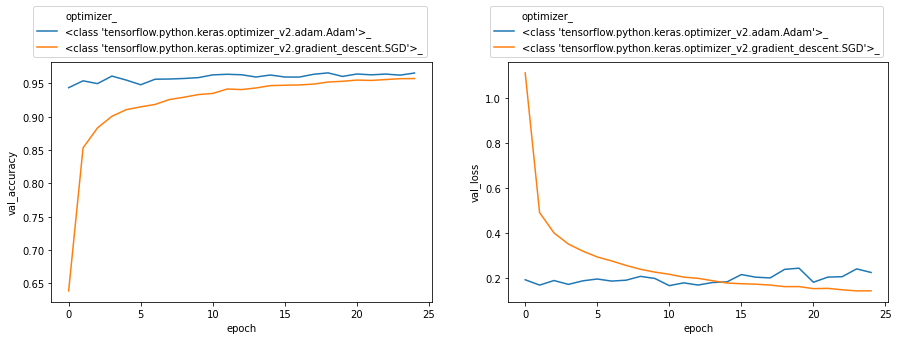

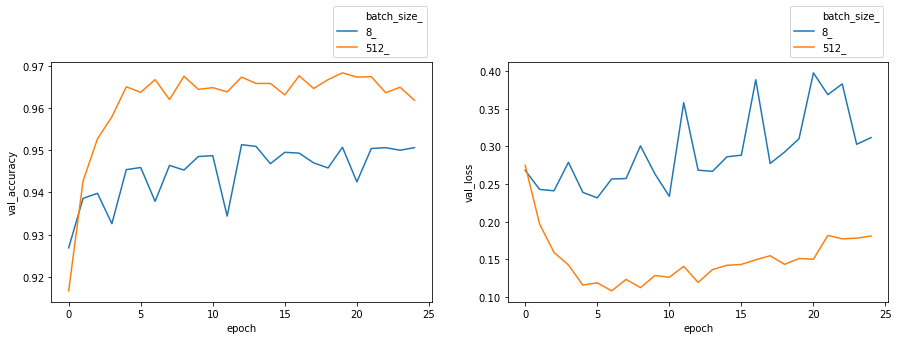

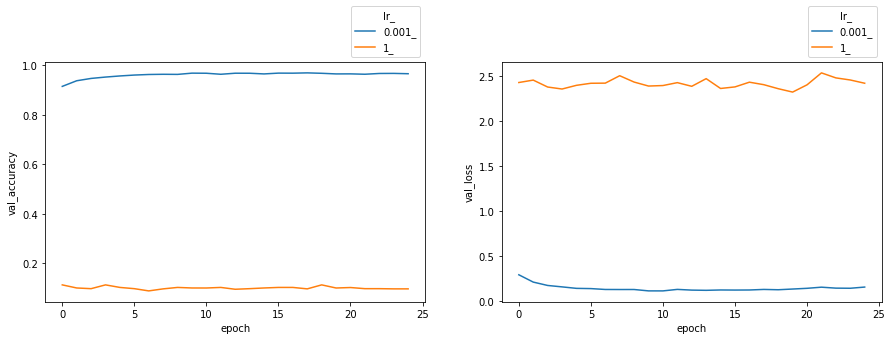

In [185]:
viz_param(df_lst)

> **In general, usually smaller batch size does more back propagation and tend to achieve higher accuracy per epoch. But it takes longer to complete each epoch**

**Large learning rate cannot converge. Too small of a learning rate needs lots of epochs to get to high accuracy, and it's slow for the same value of batch_size**

### epochs
epoch is like iteration over the dataset. At some epoch we won't get more improvement.
let's keep batch_size=32, and lr=0.01 and run for 50 epoch

In [178]:
epoch_lst = [50]
model_epoch = fit_param(epoch_lst, "epochs")

********* Fitting for epochs=50 *********
Epoch 1/50
1875/1875 [==============================] - 2s 835us/step - loss: 0.4814 - accuracy: 0.8412 - val_loss: 0.2037 - val_accuracy: 0.9377
Epoch 2/50
1875/1875 [==============================] - 1s 744us/step - loss: 0.1878 - accuracy: 0.9443 - val_loss: 0.1604 - val_accuracy: 0.9552
Epoch 3/50
1875/1875 [==============================] - 1s 737us/step - loss: 0.1656 - accuracy: 0.9526 - val_loss: 0.1868 - val_accuracy: 0.9497
Epoch 4/50
1875/1875 [==============================] - 1s 737us/step - loss: 0.1452 - accuracy: 0.9583 - val_loss: 0.1683 - val_accuracy: 0.9556
Epoch 5/50
1875/1875 [==============================] - 1s 729us/step - loss: 0.1401 - accuracy: 0.9613 - val_loss: 0.1546 - val_accuracy: 0.9585
Epoch 6/50
1875/1875 [==============================] - 1s 741us/step - loss: 0.1301 - accuracy: 0.9629 - val_loss: 0.1977 - val_accuracy: 0.9547
Epoch 7/50
1875/1875 [==============================] - 1s 745us/step - loss: 0.12

In [181]:
data_param(model_epoch).head()

,loss,accuracy,val_loss,val_accuracy,epoch,epochs_
0,0.299422,0.907400,0.203667,0.9377,0,50_
1,0.182428,0.946050,0.160429,0.9552,1,50_
2,0.164255,0.953117,0.186818,0.9497,2,50_
3,0.150460,0.957417,0.168315,0.9556,3,50_
4,0.144594,0.959750,0.154644,0.9585,4,50_


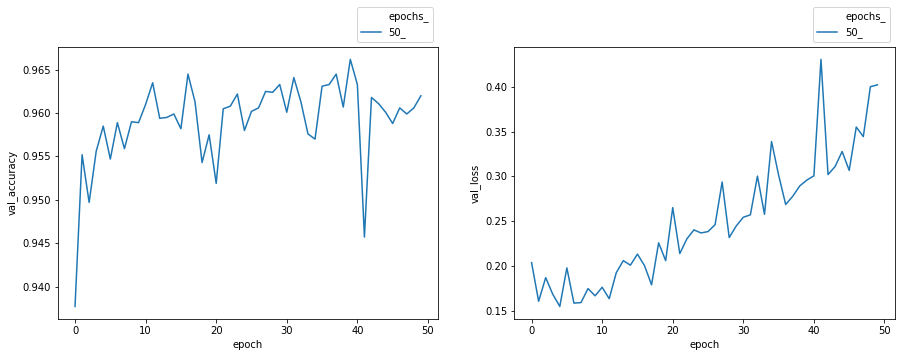

In [186]:
viz_param([data_param(model_epoch)])